In [1]:
import matplotlib.pyplot as plt

In [2]:
import gymnasium as gym
import numpy as np
from stable_baselines3.common.atari_wrappers import (
    ClipRewardEnv,
    EpisodicLifeEnv,
    FireResetEnv,
    MaxAndSkipEnv,
    NoopResetEnv,
)

2023-06-12 06:25:48.645249: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-12 06:25:48.698046: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-12 06:25:49.494068: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
def make_env(env_id, seed, idx, capture_video, run_name):
    # def thunk():
        if capture_video and idx == 0:
            env = gym.make(env_id, render_mode="rgb_array")
            env = gym.wrappers.RecordVideo(env, f"videos/{run_name}")
        else:
            env = gym.make(env_id)
        env = gym.wrappers.RecordEpisodeStatistics(env)
        env = NoopResetEnv(env, noop_max=30)
        env = MaxAndSkipEnv(env, skip=4)
        env = EpisodicLifeEnv(env)
        if "FIRE" in env.unwrapped.get_action_meanings():
            env = FireResetEnv(env)
        env = ClipRewardEnv(env)
        env = gym.wrappers.ResizeObservation(env, (84, 84))
        env = gym.wrappers.GrayScaleObservation(env)
        env = gym.wrappers.FrameStack(env, 4)
        env.action_space.seed(seed)

        return env

    # return thunk

In [4]:
class Args:
  env_id = 'BreakoutNoFrameskip-v4'
  seed = 123
  capture_video = False
  num_envs = 5

args=Args()
run_name = "test"

In [5]:
env = make_env(args.env_id, 
          args.seed,
          0, 
          args.capture_video, 
          run_name)

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


In [6]:
state, _ = env.reset();

In [7]:
state
# 
# class LazyFrames:
#     Ensures common frames are only stored once to optimize memory use.

#     To further reduce the memory use, it is optionally to turn on lz4 to compress the observations.

#     Note:
#         This object should only be converted to numpy array just before forward pass.

# # https://github.com/openai/gym/blob/master/gym/wrappers/frame_stack.py
# """

# 
# This class exposes __array__ method, which is numpy interface to convert anything into array-like. 
# So, to convert LazyFrames into ndarray, you just need to call np.array(lazy_frames_instance)

# # https://github.com/Shmuma/ptan/issues/19
# 

In [8]:
state_np = np.array(state, dtype=np.uint8)

In [9]:
state_np

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [10]:
state.shape

(4, 84, 84)

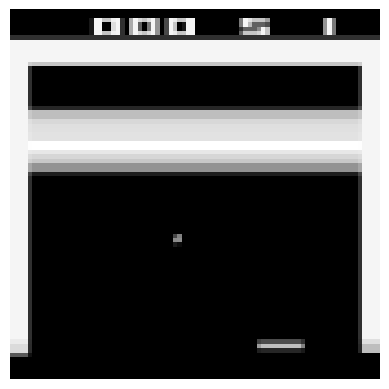

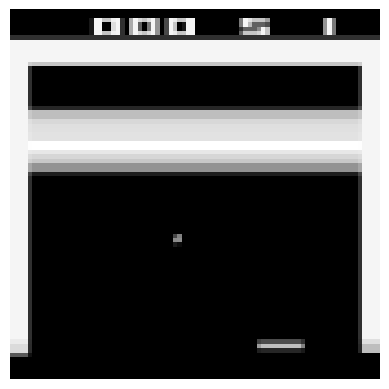

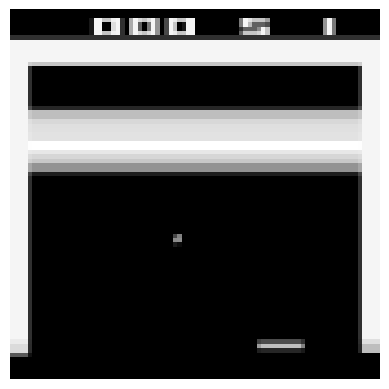

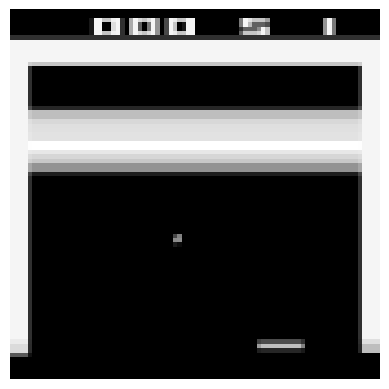

In [12]:
for i in range(state.shape[0]):
    plt.figure(i)
    plt.axis(False)
    plt.imshow(state[i],cmap='gray')

In [ ]:
env.unwrapped

In [ ]:
env.observation_space
# Box(low, high, shape, dtype)

In [ ]:
env.action_space